In [1]:
from PIL import Image
import cv2
import math
import numpy as np
import os

In [2]:
Jie_p="jieping" # jieping content
if not os.path.exists(Jie_p):
    os.makedirs(Jie_p)
small="small" #small file
if not os.path.exists(small):
    os.makedirs(small)
big="big" #big photo
if not os.path.exists(big):
    os.makedirs(big)
root="data" #base data
heic="heic"
if not os.path.exists(heic):
    os.makedirs(heic)
zp="zp" #photo
if not os.path.exists(zp):
    os.makedirs(zp)

In [3]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import *

In [4]:
#将某个文件夹的图片移动到另一个文件夹，加上某个条件判断
def movefile(source_folder,target_folder,condition):
    filelist=os.listdir(source_folder)
    for files in filelist:
        if files[0]==".":
            continue
        #try:
        if condition(os.path.join(source_folder,files)):
            full_path=os.path.join(source_folder,files)
            des_path=os.path.join(target_folder,files)
            shutil.move(full_path,des_path)
        #except:
        #    print(os.path.join(source_folder,files))

In [8]:
def if_heic(file_path):
    if ".heic" in file_path:
        return True
    else:
        return False
movefile(root,heic,if_heic)

In [26]:
def if_jieping(file_path):
    if ".heic" in file_path:
        return False
    try:
        im=Image.open(file_path)
        if im.size[0]==602 and im.size[1]==1304:
            return True
        else:
            return False
    except:
        print(file_path)
movefile(root,Jie_p,if_jieping)

In [11]:
def if_big(file_path):
    size=os.path.getsize(file_path)
    if size>=1048576:
        return True
    else:
        return False
movefile(root,big,if_big)

In [12]:
def if_small(file_path):
    size=os.path.getsize(file_path)
    if size<=102400:
        return True
    else:
        return False
movefile(root,small,if_small)

In [17]:
def if_zp(file_path):
    if ".heic" in file_path:
        return False
    try:
        im=Image.open(file_path)
        if (im.size[0]==4032 and im.size[1]==3024) or (im.size[0]==3024 and im.size[1]==4032):
            return True
        else:
            return False
    except:
        print(file_path)
movefile(root,zp,if_zp)

In [22]:
if not os.path.exists(zp+"/3263_2448"):
    os.makedirs(zp+"/3263_2448")
def if_zp(file_path):
    if ".heic" in file_path:
        return False
    try:
        im=Image.open(file_path)
        if (im.size[0]==3263 and im.size[1]==2448) or (im.size[0]==2448 and im.size[1]==3263):
            return True
        else:
            return False
    except:
        print(file_path)
movefile(root,zp+"/3263_2448",if_zp)

In [25]:
if not os.path.exists(zp+"/1920_1080"):
    os.makedirs(zp+"/1920_1080")
def if_zp(file_path):
    if ".heic" in file_path:
        return False
    try:
        im=Image.open(file_path)
        if (im.size[0]==1920 and im.size[1]==1080) or (im.size[0]==1080 and im.size[1]==1920):
            return True
        else:
            return False
    except:
        print(file_path)
movefile(root,zp+"/1920_1080",if_zp)

In [38]:
path="data/7"
classes=15
for i in range(classes):
    isExists=os.path.exists(path+"/"+str(i))
    # 判断结果
    if not isExists:
        # 如果不存在则创建目录
        # 创建目录操作函数
        os.makedirs(path+"/"+str(i))

In [39]:
filelist=os.listdir(path)
for files in filelist:
    if files[0]==".":
        continue
    if os.path.isdir(os.path.join(path,files)):
        continue
    try:
        img = mpimg.imread(os.path.join(path,files))
        HSV=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(HSV)
        
        x=V.shape[0]
        y=V.shape[1]
        newV=V[np.arange(0,x,30)][:,np.arange(0,y,30)]
        count=[0 for i in range(classes)]
        for j in newV:
            for i in j:
                count[math.floor(i/(256/classes))]+=1
        which_class=argmax(count)
        
        full_path=os.path.join(path,files)
        des_path=os.path.join(path,str(which_class),files)
        shutil.move(full_path,des_path)
    except:
        print(files)

In [47]:
x=H.shape[0]
y=H.shape[1]
newH=H[np.arange(0,x,100)][:,np.arange(0,y,100)]
count=[0 for i in range(classes)]
for i in newH:
    count[i/(360/classes)]+=1
which_classes=argmax(count)

(11, 20)

In [52]:
for i in H:
    print(i)

[101 101 101 ...  12  12  12]
[101 101 101 ...  12  12  12]
[101 101 101 ...  12  12  12]
[95 95 95 ... 12 12 12]
[95 95 95 ... 12 12 12]
[95 95 95 ... 13 13 13]
[95 95 95 ... 13 13 13]
[85 85 85 ... 13 13 13]
[85 85 85 ... 13 13 13]
[85 85 85 ... 13 13 13]
[95 95 95 ... 13 13 13]
[95 95 95 ... 13 13 13]
[95 95 95 ... 13 13 13]
[85 85 85 ... 13 13 13]
[77 77 77 ... 13 13 13]
[69 69 77 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[77 77 77 ... 13 13 13]
[77 77 77 ... 13 13 13]
[77 77 77 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 13 13 13]
[78 78 78 ... 12 12 12

In [48]:
argmax([1,2,3,4])

3

In [33]:
 help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [101]:
import math
math.floor(0.5)

0

In [30]:
im=Image.open("big/0F22CAC7-69BE-413F-8537-5E2C2CFD30F4.png")

In [63]:
img = mpimg.imread('data/0A3A39D6-3937-4E95-91C1-1852B757F246.jpeg')

In [17]:
img.shape

(1250, 1080, 3)

In [25]:
im=img[:,:,2]

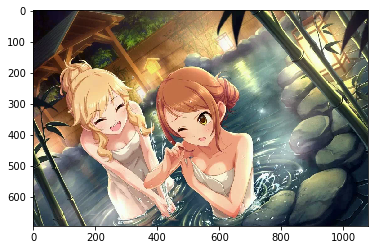

In [31]:
plt.imshow(im)
plt.show()

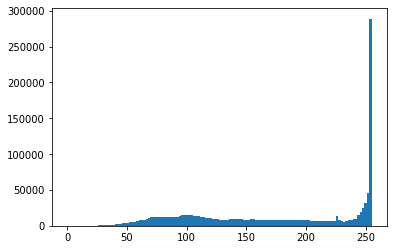

In [29]:
hist(im.flatten(),128)
show()

In [33]:
im.size

(1080, 695)

In [69]:
import cv2

In [50]:
plt.show()

In [55]:
from PIL import Image
from PIL.ExifTags import TAGS
 
for (k,v) in Image.open('data/0A1EBEC2-D5CF-4620-ACC7-B1E1434F592E.jpeg')._getexif().items():
    print(TAGS.get(k),v)

import exifread

f = open("data/0A1EBEC2-D5CF-4620-ACC7-B1E1434F592E.jpeg", 'rb')
tags = exifread.process_file(f)
for tag in tags.keys():
    print(tag, tags[tag])

ExifVersion b'0221'
ComponentsConfiguration b'\x01\x02\x03\x00'
FlashPixVersion b'0100'
ColorSpace 1
ExifImageWidth 851
ExifImageHeight 2722
SceneCaptureType 0
ResolutionUnit 2
ExifOffset 102
Orientation 1
YCbCrPositioning 1
XResolution (72, 1)
YResolution (72, 1)


ModuleNotFoundError: No module named 'exifread'